In [14]:
import pandas as pd
import numpy as np
import random
import csv

In [15]:
def make_analyze(df, N, prob):
    magnetization_list = []
    rho_surf_list = []
    n_of_c_comp_list = []
    tau_for_N_list = []

    for i in df.index:
        magnetization_list.append(abs(df['p_links'][i] - df['n_links'][i])/df["number_of_edges"][i])
        rho_surf_list.append(df['active_links'][i]/df["number_of_edges"][i])
        n_of_c_comp_list.append(df['n_of_c_comp'][i]/N)
        tau_for_N_list.append(df['tau'][i]/N)


    magnetization = np.mean(magnetization_list)
    rho_surf = np.mean(rho_surf_list)
    n_of_c_comp = np.mean(n_of_c_comp_list)
    tau_for_N = np.mean(tau_for_N_list)
    
    tab = []
    tab.append(prob)
    tab.append(magnetization)
    tab.append(rho_surf)
    tab.append(n_of_c_comp)
    tab.append(tau_for_N)
    
    return tab

In [16]:
N = 250
step = 0.01
prob = np.arange(0, 0.51, step)

dataframe = pd.DataFrame(columns = ["prob", "magnetization", "rho_surf", "n_of_c_comp", "tau"])

for i in range(len(prob)):
    df = pd.read_csv('results/250N_step001_1000_prob00-05/p%i_N250.csv' %i, names = ["tau", "n_of_c_comp", "active_links", "p_links", "n_links", "number_of_edges"])
    a_series = pd.Series(make_analyze(df, N, prob[i]), index = dataframe.columns)
    dataframe = dataframe.append(a_series, ignore_index=True)

In [17]:
dataframe

,prob,magnetization,rho_surf,n_of_c_comp,tau
0,0.00,1.000000,0.163768,1.000000,0.975232
1,0.01,0.999984,0.165844,0.999764,0.984340
2,0.02,0.999928,0.169286,0.999288,0.981856
3,0.03,0.999864,0.165041,0.998880,0.957612
4,0.04,0.999876,0.152694,0.998444,0.947476
5,0.05,0.999696,0.156368,0.997908,0.940196
6,0.06,0.999732,0.172810,0.997448,0.992688
7,0.07,0.999680,0.159439,0.997360,1.012936
8,0.08,0.999380,0.160549,0.996748,1.000328
9,0.09,0.999168,0.159864,0.996520,1.021848


In [18]:
step = 0.05
prob = np.arange(0, 1.05, step)

dataframe2 = pd.DataFrame(columns = ["prob", "magnetization", "rho_surf", "n_of_c_comp", "tau"])

for i in range(11,len(prob)):
    df = pd.read_csv('results/250N_step005_1000_prob00-10/p%i_N250.csv' %i, names = ["tau", "n_of_c_comp", "active_links", "p_links", "n_links", "number_of_edges"])
    a_series = pd.Series(make_analyze(df, N, prob[i]), index = dataframe2.columns)
    dataframe2 = dataframe2.append(a_series, ignore_index=True)

In [19]:
dataframe2

,prob,magnetization,rho_surf,n_of_c_comp,tau
0,0.55,0.119308,0.0,0.555996,0.143048
1,0.60,0.118576,0.0,0.555352,0.144548
2,0.65,0.099140,0.0,0.546568,0.103352
3,0.70,0.094704,0.0,0.544516,0.103456
4,0.75,0.080420,0.0,0.537112,0.081560
5,0.80,0.079604,0.0,0.536768,0.080748
6,0.85,0.066508,0.0,0.531044,0.065096
7,0.90,0.061392,0.0,0.528348,0.064788
8,0.95,0.052524,0.0,0.523884,0.055132
9,1.00,0.055248,0.0,0.524620,0.054056


In [20]:
dataframe = dataframe.append(dataframe2)

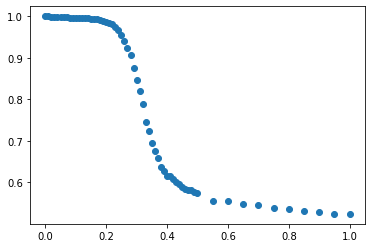

In [21]:
import matplotlib.pyplot as plt

plt.plot(dataframe["prob"], dataframe["n_of_c_comp"], 'o')
plt.draw()